# Lab09
## CPSC 4800




# Exercise 1

For this exercise, we are going to load the iris dataset via seaborn:

In [1]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

In [2]:
# head of the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Using the iris dataset, answer the following questions using seaborn:**
- Learn about the dataset here (https://www.kaggle.com/arshid/iris-flower-dataset)
- Get the summary statistics of the data
- Draw scatterplots for joint relationships and histograms for univariate distributions
- Add another dimension ("species") to the pairplot
- Use a different color palette in your pairplot (hint: add this paramater to your code: `palette="husl"`)
- Use different markers for each level of the hue variable ((hint: add this paramater to your code: `markers=["o", "s", "D"]`), all possible markers are defined here: https://matplotlib.org/3.1.0/api/markers_api.html
- Show pairplot only for few variables ["sepal_width", "sepal_length"]: (hint: use `vars` argument)
- Plot only the lower triangle of bivariate axes (hint: use `corner = True`)

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Summary of statistic data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


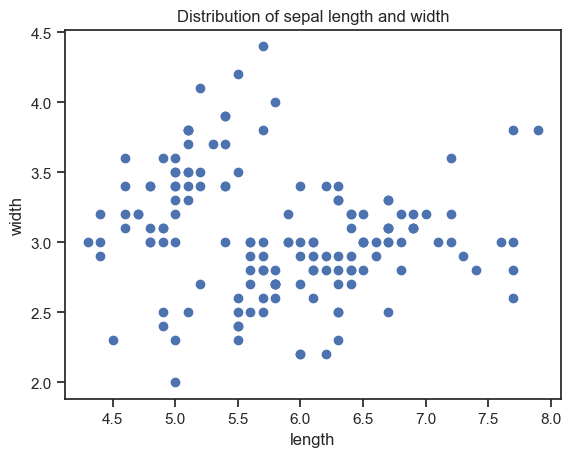

In [10]:
# Draw scatter plot for 
x= np.array(iris['sepal_length'])
y = np.array(iris['sepal_width'])
plt.scatter(x, y)
plt.xlabel('length')
plt.ylabel('width')
plt.title('Distribution of sepal length and width')
plt.show()

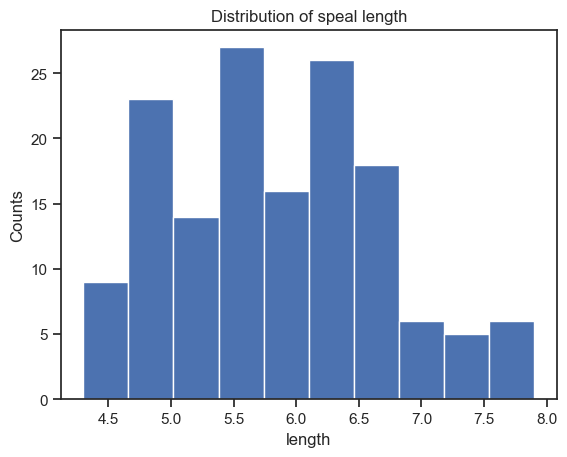

In [13]:
# Histogram of sepal length
plt.hist(iris['sepal_length'])
plt.title('Distribution of speal length')
plt.xlabel('length')
plt.ylabel('Counts')
plt.show()

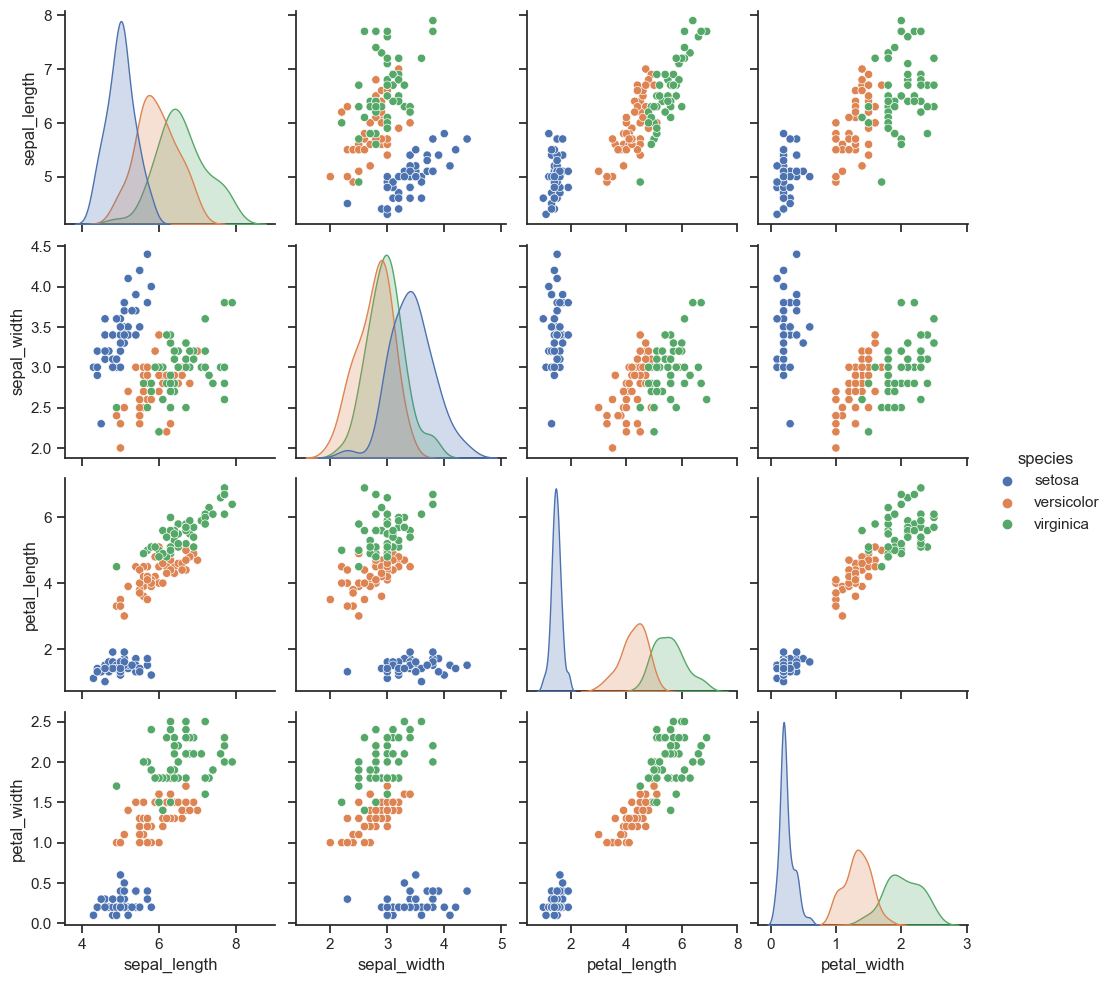

In [20]:
# Add another dimension ("species") to the pairplot
sns.pairplot(iris, hue='species')
plt.show()

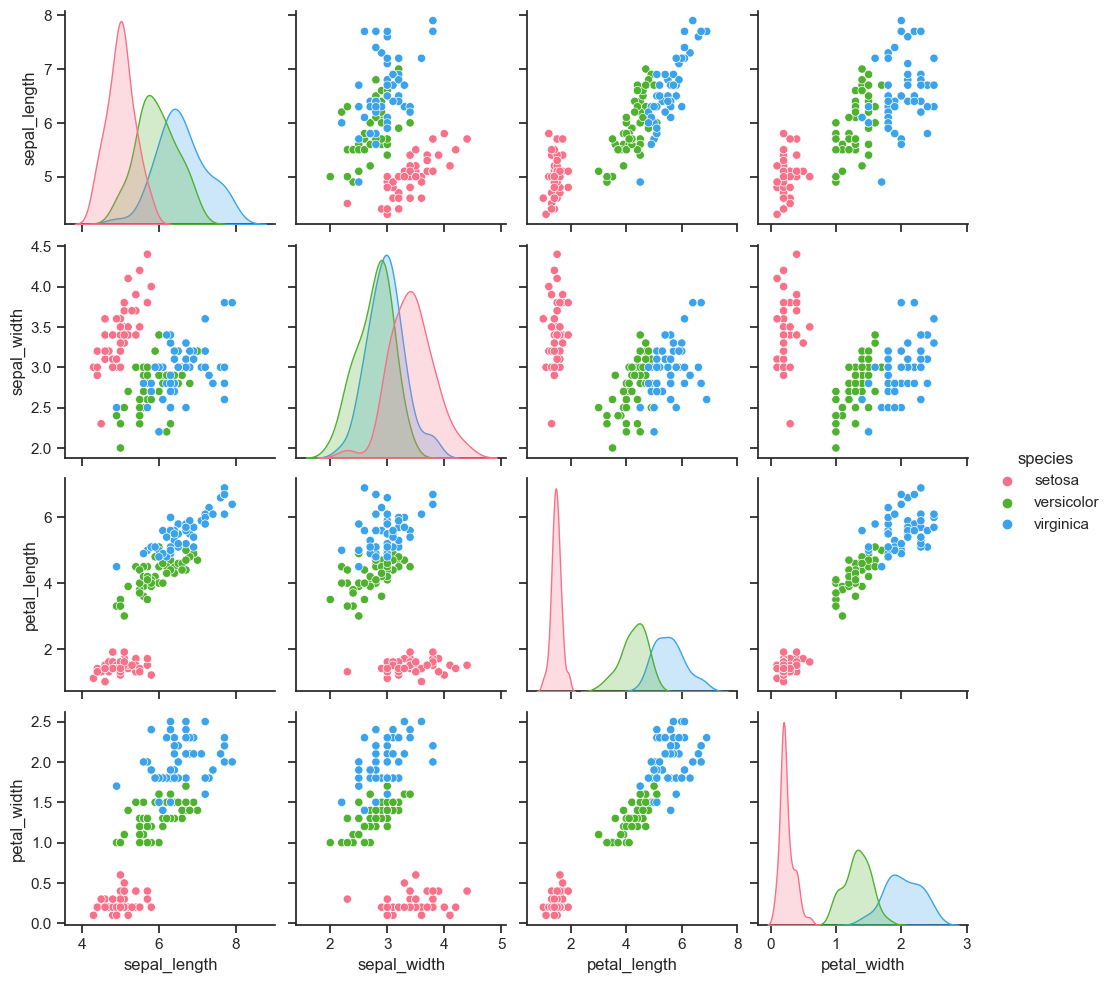

In [18]:
# Add pallete
sns.pairplot(iris, hue='species', palette ='husl') #palette="husl" #dark
plt.show()

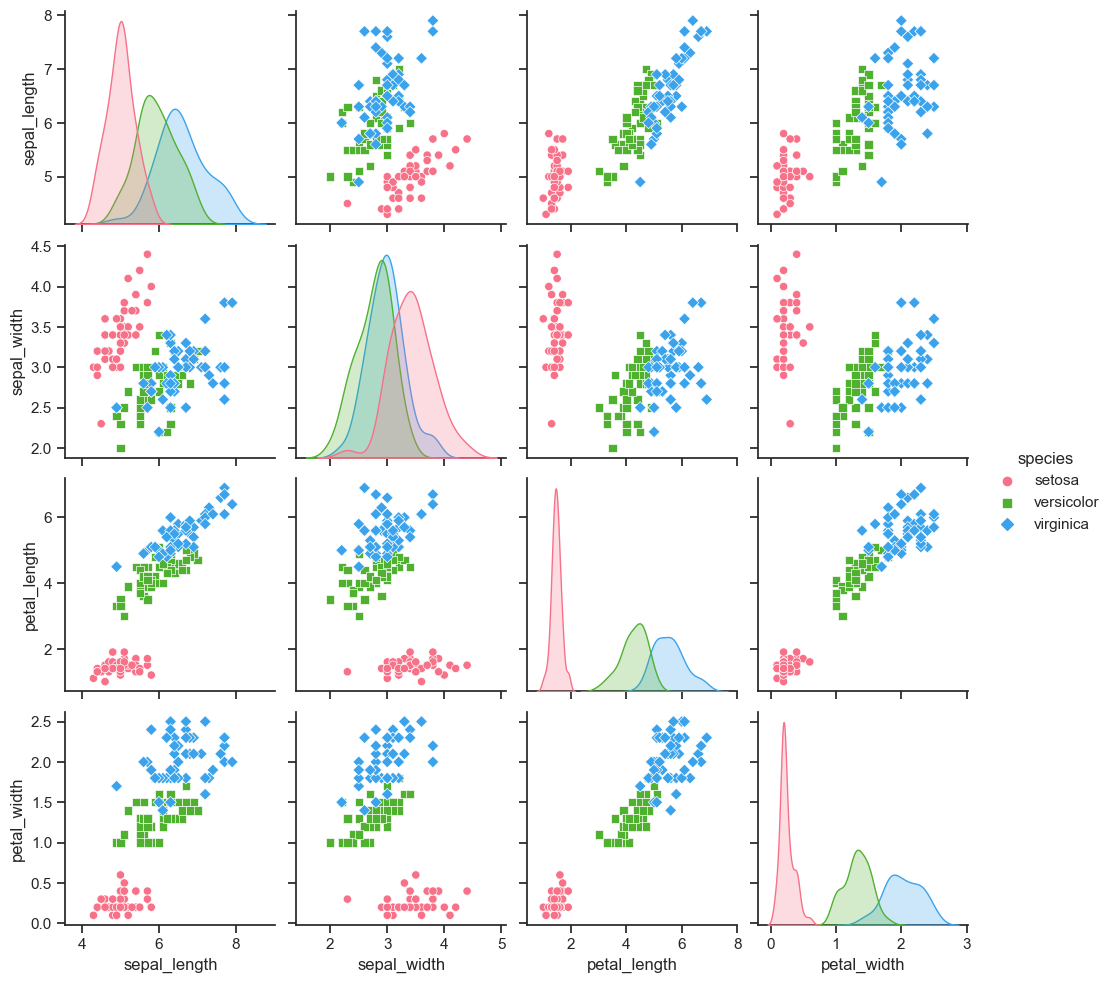

In [19]:
# Add markers
sns.pairplot(iris, hue='species', palette ='husl', markers=["o", "s", "D"])
plt.show()

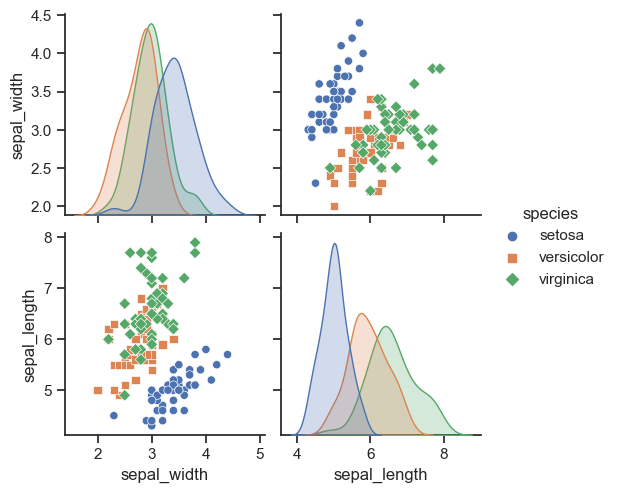

In [21]:
# Select specific variables
sns.pairplot(iris, vars = ["sepal_width", "sepal_length"], hue='species', markers=["o", "s", "D"])
plt.show()

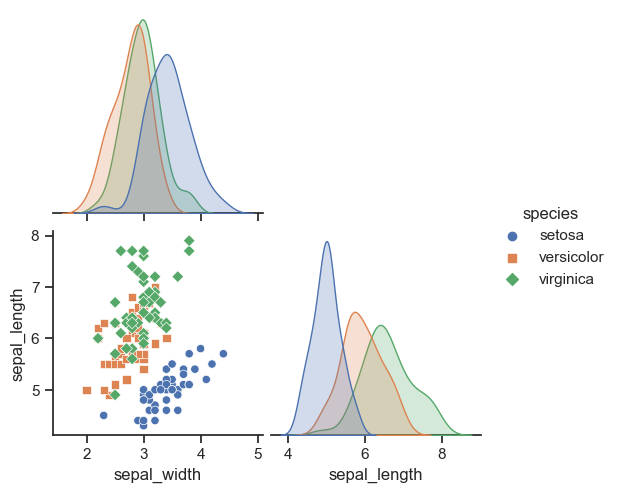

In [22]:
# Plot only the lower triangle of bivariate axes
sns.pairplot(iris, vars = ["sepal_width", "sepal_length"], markers=["o", "s", "D"], corner = True)
plt.show()


# Exercise 2

This exercise is aimed toward data analysis of flight delay for NYC in 2013. Pleaes download the flight_data.csv from the lab folder. This file contains dataset information about all flights that departed from NYC (e.g. EWR, JFK and LGA) in 2013: 336,776 flights in total.


### Github
Please create a **private** github repo and submit your answers on the **private github**. Please add me as collaborator to your github account: `nasimtaba` to review your work.

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project 
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)





**Try to explore this dataset, in particular, you can answer the following questions:**
 - Display top 10 destination flights from NYC in a bar graph, add title and labels for axes
 - Show the bar graph for average departure delay by origin
 - Show the bar graph for average departure delay by carrier

In [4]:
flight = pd.read_csv('flight_data.csv')
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


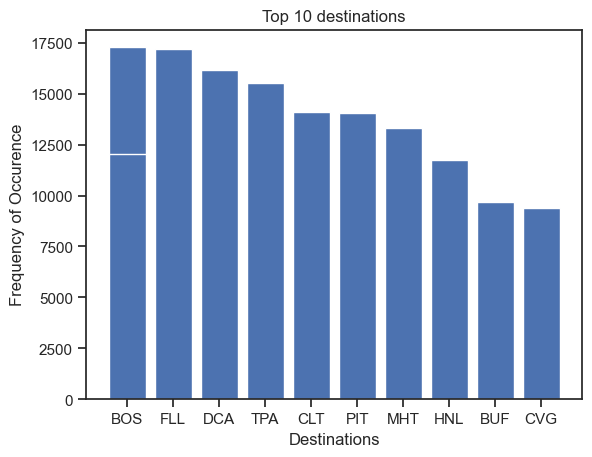

In [5]:
# Display top 10 destination flights from NYC in a bar graph, add title and labels for axes

plt.bar(flight["dest"][flight["dest"].value_counts().head(11)], flight["dest"].value_counts().head(11))
plt.title("Top 10 destinations")
plt.xlabel("Destinations")
plt.ylabel("Frequency of Occurence")
plt.show()

In [74]:
# List of top 10 flight destinations
top_des = flight['dest'].value_counts().head(10)
top_des

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
Name: dest, dtype: int64

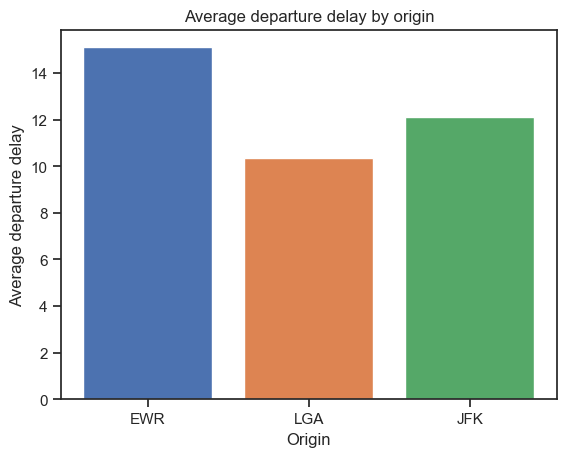

In [6]:
# Show the bar graph for average departure delay by origin

for i in flight["origin"].unique():
    mean=flight["dep_delay"][flight["origin"]==i].mean()
    plt.bar(i,mean)
plt.title("Average departure delay by origin")
plt.xlabel("Origin")
plt.ylabel("Average departure delay")
plt.show()

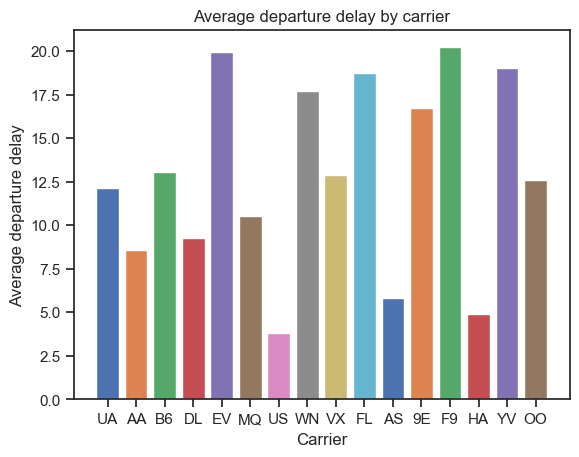

In [7]:
# Show the bar graph for average departure delay by carrier

for i in flight["carrier"].unique():
    mean=flight["dep_delay"][flight["carrier"]==i].mean()
    plt.bar(i,mean)
plt.title("Average departure delay by carrier")
plt.xlabel("Carrier")
plt.ylabel("Average departure delay")
plt.show()

# Exercise 3

The two datasets for this question are exported from this Kaggle competition. You can read more about these two datasets here: 
https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings?select=rating_final.csv


Download final_rating.csv and userprofile.csv from D2L.



Read both datasets in python and answer the following questions.
1. How many times each user has rated?
2.Plot the rating distribution.
3.Plot the food rating and service rating distribution
4.Plot the relationship between height and weight. Can you fit a regression line?
5.What is the average height of the users per drink_level? Create the appropriate plot.


In [9]:
#Read dataset
finalrating = pd.read_csv('rating_final.csv')
finalrating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [12]:
#How many times each user has rated?
for i in finalrating["userID"].unique():
    print("User with ID:", i, "number of ratings:", finalrating["rating"][finalrating["userID"]==i].count())

User with ID: U1077 number of ratings: 5
User with ID: U1068 number of ratings: 8
User with ID: U1067 number of ratings: 6
User with ID: U1103 number of ratings: 8
User with ID: U1107 number of ratings: 3
User with ID: U1044 number of ratings: 5
User with ID: U1070 number of ratings: 3
User with ID: U1031 number of ratings: 3
User with ID: U1082 number of ratings: 9
User with ID: U1023 number of ratings: 4
User with ID: U1060 number of ratings: 4
User with ID: U1015 number of ratings: 8
User with ID: U1123 number of ratings: 8
User with ID: U1021 number of ratings: 3
User with ID: U1026 number of ratings: 5
User with ID: U1083 number of ratings: 9
User with ID: U1108 number of ratings: 10
User with ID: U1012 number of ratings: 5
User with ID: U1093 number of ratings: 8
User with ID: U1030 number of ratings: 8
User with ID: U1066 number of ratings: 5
User with ID: U1127 number of ratings: 4
User with ID: U1017 number of ratings: 3
User with ID: U1100 number of ratings: 6
User with ID: U

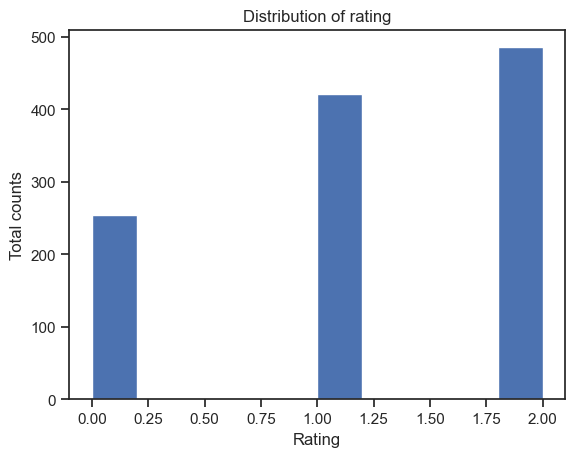

In [33]:
#Plot the rating distribution
plt.hist(finalrating['rating'])
plt.title('Distribution of rating')
plt.xlabel('Rating')
plt.ylabel('Total counts')
plt.show()

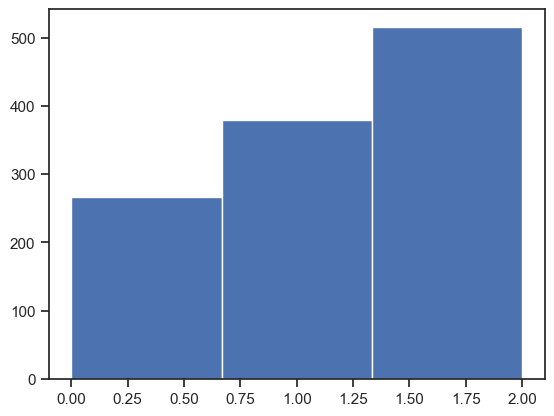

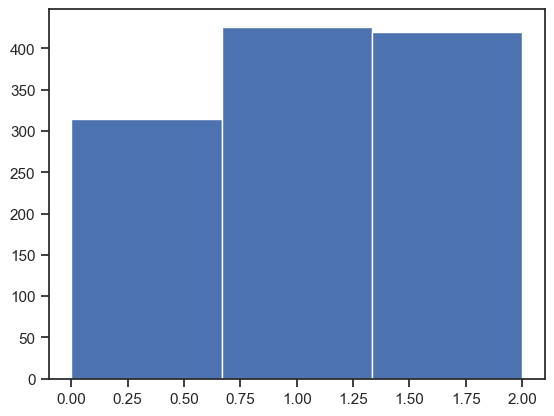

In [13]:
# Plot the food rating and service rating distribution

plt.hist(finalrating["food_rating"], bins = 3)
plt.show()
plt.hist(finalrating["service_rating"], bins = 3)
plt.show()

In [26]:
#Read dataset
userprofile = pd.read_csv('userprofile.csv')
userprofile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


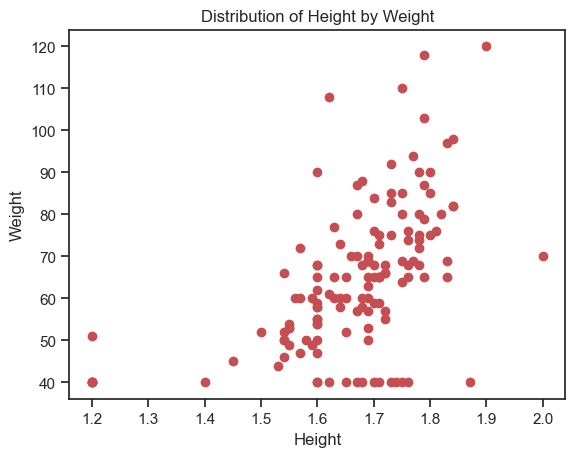

In [39]:
plt.scatter(np.array(userprofile['height']), np.array(userprofile['weight']), color ='r')
plt.xlabel('Height')
plt.ylabel("Weight")
plt.title('Distribution of Height by Weight')
plt.show()

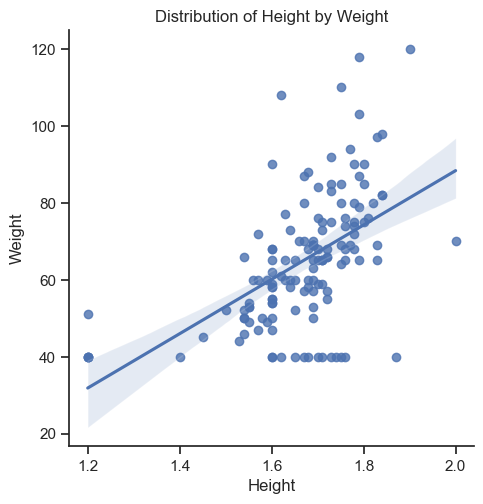

In [43]:
sns.lmplot(x = 'height', y = 'weight', data = userprofile, fit_reg=True)
plt.xlabel('Height')
plt.ylabel("Weight")
plt.title('Distribution of Height by Weight')
plt.show()

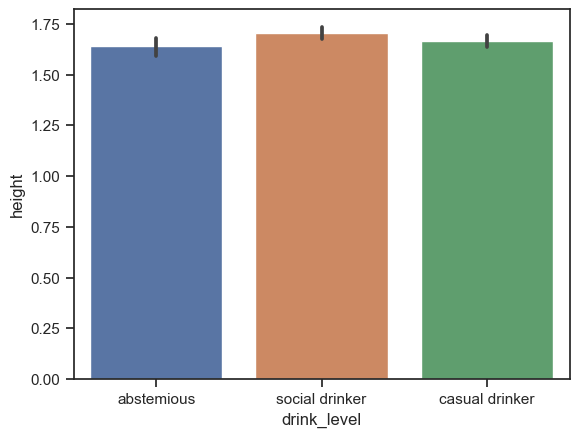

In [45]:
sns.barplot(x = "drink_level", y = "height", data = userprofile)
plt.show()

In [47]:
#Option 1:
userprofile.groupby('drink_level')['height'].mean()

drink_level
abstemious        1.641373
casual drinker    1.665319
social drinker    1.703500
Name: height, dtype: float64

In [48]:
#Option 2:
userprofile.groupby('drink_level')['height'].describe()

,count,mean,std,min,25%,50%,75%,max
drink_level,,,,,,,,
abstemious,51.0,1.641373,0.161728,1.2,1.60,1.68,1.750,1.90
casual drinker,47.0,1.665319,0.109740,1.2,1.60,1.68,1.725,1.84
social drinker,40.0,1.703500,0.099164,1.5,1.62,1.71,1.765,2.00
